In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# import the lipidomic data
lipids = pd.read_hdf('lba_all_pixels_fully_abamapped11062023-002.h5')


lipids_exponentiated = lipids.copy()

# fill in background pixels and exponentiate (the data we imported were logged, you can play with both scales)
lipids_exponentiated = lipids_exponentiated.fillna(-9.21)
lipids_exponentiated.iloc[:,3:205] = np.exp(lipids_exponentiated.iloc[:,3:205].values)

section_12 = lipids_exponentiated.loc[lipids['Section'] == 12]


In [5]:
# import genomics data
cells = pd.read_hdf('cell_filtered_w500genes-001.h5', 'df')# your path
cells_section_12 = cells.loc[(cells['x_ccf'] > 7.4) & (cells['x_ccf'] < 7.8), :]

In [6]:
# recording for each gene point the distance to closest lipid point
gp_dist = {}
log = 0
for gp in list(cells_section_12.index):
    v1 = cells_section_12.loc[gp][['y_ccf', 'z_ccf']].to_numpy(dtype='float32')
    v2 = np.asarray(section_12[['y_ccf', 'z_ccf']])
    dist = np.linalg.norm(v1-v2, axis=1)
    ind = np.argmin(dist)
    gp_dist[gp] = (dist[ind], ind)
    log+=1
    if(log%10000==0): print(log)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000


We can see, that natural threshold for gene points closest distance is 0.02

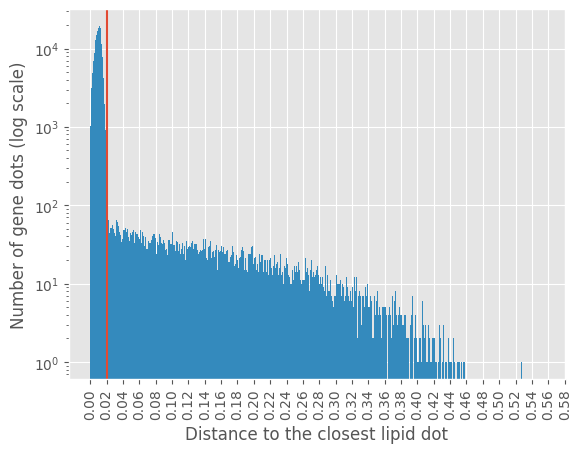

In [33]:
plt.style.use('ggplot')
plt.hist([i[0] for i in gp_dist.values()], bins = 500, color = 'C1')
plt.yscale('log')
plt.xlabel('Distance to the closest lipid dot')
plt.ylabel('Number of gene dots (log scale)')
plt.xticks(np.arange(0, 0.6, 0.02), rotation = 90)
plt.axvline(0.02, c = 'C0')
plt.show()

However, if we repeat the same experiment with lipid points, the distance will be 0.06. I suggest to use that one

In [12]:
selected_gp = [i for i in gp_dist.keys() if gp_dist[i][0] <= 0.06]
len(selected_gp)

180292

In [9]:
la_dist = {}
log = 0
for la in list(section_12.index):
    v1 = section_12.loc[la][['y_ccf', 'z_ccf']].to_numpy(dtype='float32')
    v2 = np.asarray(cells_section_12[['y_ccf', 'z_ccf']])
    dist = np.linalg.norm(v1-v2, axis=1)
    ind = np.argmin(dist)
    la_dist[la] = (dist[ind], ind)
    log+=1
    if(log%10000==0): print(log)

10000
20000
30000
40000
50000
60000
70000
80000
90000


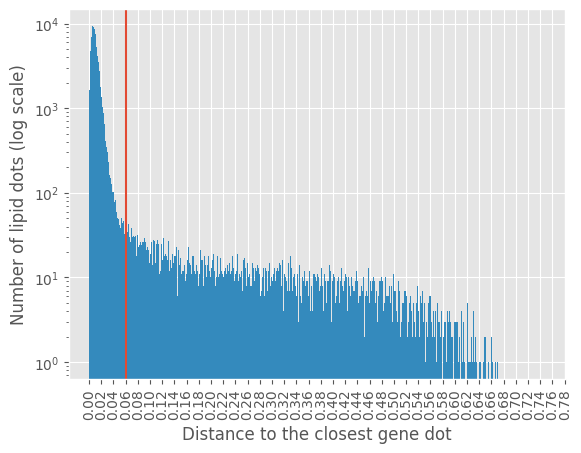

In [49]:
plt.style.use('ggplot')
plt.hist([i[0] for i in la_dist.values()], bins = 500, color = 'C1')
plt.yscale('log')
plt.xlabel('Distance to the closest gene dot')
plt.ylabel('Number of lipid dots (log scale)')
plt.xticks(np.arange(0, 0.8, 0.02), rotation = 90)
plt.axvline(0.06, c = 'C0')
plt.show()

In [13]:
selected_la = [i for i in la_dist.keys() if la_dist[i][0] <= 0.06]
len(selected_la)

90213

On the picture bellow gene points that has at lieast one lipid point closer than 0.06 are colored black, others red

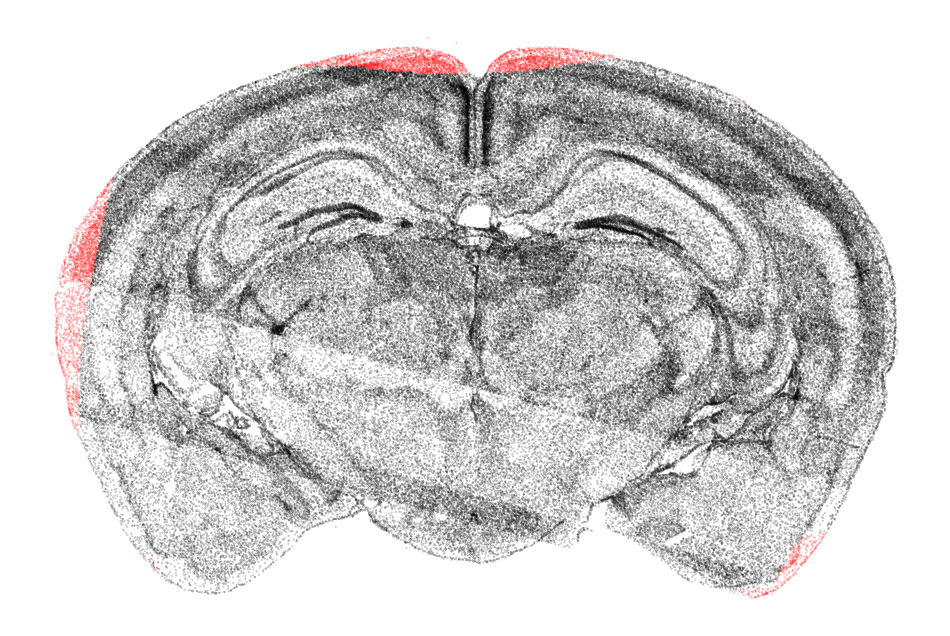

In [8]:
cols = ['k' if gp_dist[i][0] <= 0.06 else 'r' for i in gp_dist.keys() ]
plt.figure(figsize=(12, 8))

dot_size = 0.05

sc1 = plt.scatter(cells_section_12['z_ccf'], -cells_section_12['y_ccf'],
            c=cols, s=dot_size, alpha=0.5)

plt.axis('off')
plt.show()

On the picture bellow gene points that has at lieast one lipid point closer than 0.06 are colored black, others red

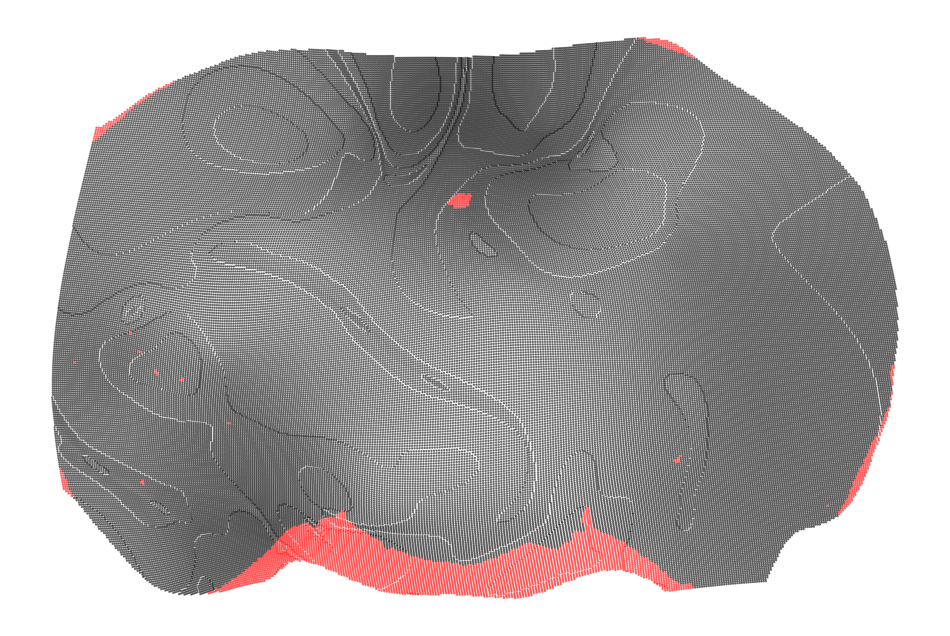

In [11]:
cols = ['k' if la_dist[i][0] <= 0.06 else 'r' for i in la_dist.keys() ]
plt.figure(figsize=(12, 8))

dot_size = 0.5

sc1 = plt.scatter(section_12['z_ccf'], -section_12['y_ccf'],
            c=cols, s=dot_size, alpha=0.5)

plt.axis('off')
plt.show()

In [17]:
#Saving results

In [15]:
f = open('gp_006.txt', 'w')
for i in selected_gp: f.write('{0}\n'.format(i))
f.close()

In [16]:
f = open('la_006.txt', 'w')
for i in selected_la: f.write('{0}\n'.format(i))
f.close()